In [8]:
# Importation des librairies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, StandardScaler

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import flask
from flask import Flask, request, render_template, url_for

In [ ]:

"""# Initialiser l'application Flask
app = Flask(__name__)
# Charger le modèle pré-entrainé
model = pickle.load(open("class_dia.pkl", "rb"))

# Route pour la page d'accueil avec la visualisation de graphiques
@app.route('/')
def home():
    # Générer l'URL de l'image à l'aide de url_for
    image_url = url_for('static', filename='image/dan.jpg')
    # Rendre le template HTML avec le graphique en arrière-plan
    return render_template('home.html', image_url = image_url)

In [9]:
path = r"C:\Users\LENOVO\Documents\M Learning/data01.csv"

In [10]:
df = pd.read_csv(path)

In [11]:
df.head(3)

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,2,NaN,0,0,0,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   group                     1177 non-null   int64  
 1   ID                        1177 non-null   int64  
 2   outcome                   1176 non-null   float64
 3   age                       1177 non-null   int64  
 4   gendera                   1177 non-null   int64  
 5   BMI                       962 non-null    float64
 6   hypertensive              1177 non-null   int64  
 7   atrialfibrillation        1177 non-null   int64  
 8   CHD with no MI            1177 non-null   int64  
 9   diabetes                  1177 non-null   int64  
 10  deficiencyanemias         1177 non-null   int64  
 11  depression                1177 non-null   int64  
 12  Hyperlipemia              1177 non-null   int64  
 13  Renal failure             1177 non-null   int64  
 14  COPD    

In [13]:
df.isnull().sum()

group                         0
ID                            0
outcome                       1
age                           0
gendera                       0
BMI                         215
hypertensive                  0
atrialfibrillation            0
CHD with no MI                0
diabetes                      0
deficiencyanemias             0
depression                    0
Hyperlipemia                  0
Renal failure                 0
COPD                          0
heart rate                   13
Systolic blood pressure      16
Diastolic blood pressure     16
Respiratory rate             13
temperature                  19
SP O2                        13
Urine output                 36
hematocrit                    0
RBC                           0
MCH                           0
MCHC                          0
MCV                           0
RDW                           0
Leucocyte                     0
Platelets                     0
Neutrophils                 144
Basophil

In [14]:
df.columns

Index(['group', 'ID', 'outcome', 'age', 'gendera', 'BMI', 'hypertensive',
       'atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
       'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
       'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen',
       'glucose', 'Blood potassium', 'Blood sodium', 'Blood calcium',
       'Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate',
       'Lactic acid', 'PCO2', 'EF'],
      dtype='object')

In [15]:
df = df.drop(['ID','PT', 'INR',
       'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen',
       'glucose', 'Blood potassium', 'Blood sodium', 'Blood calcium',
       'Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate',
       'Lactic acid', 'PCO2', 'EF'], axis = 1)

In [16]:
df.isnull().sum()

group                         0
outcome                       1
age                           0
gendera                       0
BMI                         215
hypertensive                  0
atrialfibrillation            0
CHD with no MI                0
diabetes                      0
deficiencyanemias             0
depression                    0
Hyperlipemia                  0
Renal failure                 0
COPD                          0
heart rate                   13
Systolic blood pressure      16
Diastolic blood pressure     16
Respiratory rate             13
temperature                  19
SP O2                        13
Urine output                 36
hematocrit                    0
RBC                           0
MCH                           0
MCHC                          0
MCV                           0
RDW                           0
Leucocyte                     0
Platelets                     0
Neutrophils                 144
Basophils                   259
Lymphocy

In [17]:
df.describe()

,group,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,...,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte
count,1177.000000,1176.000000,1177.000000,1177.000000,962.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,...,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1033.000000,918.000000,1032.000000
mean,1.299065,0.135204,74.055225,1.525064,30.188278,0.717927,0.451147,0.085811,0.421410,0.338997,...,3.575010,29.539939,32.864327,89.903812,15.952129,10.712948,241.504323,80.113544,0.405569,12.233024
std,0.458043,0.342087,13.434061,0.499584,9.325997,0.450200,0.497819,0.280204,0.493995,0.473570,...,0.626835,2.619054,1.402302,6.532629,2.131643,5.229402,113.120623,11.133243,0.465007,8.632807
min,1.000000,0.000000,19.000000,1.000000,13.346801,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.030000,18.125000,27.825000,62.600000,12.088889,0.100000,9.571429,5.000000,0.100000,0.966667
25%,1.000000,0.000000,65.000000,1.000000,24.326461,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.120000,28.250000,32.011111,86.250000,14.460000,7.440000,168.909091,74.775000,0.200000,6.650000
50%,1.000000,0.000000,77.000000,2.000000,28.312474,1.000000,0.000000,0.000000,0.000000,0.000000,...,3.490000,29.750000,32.985714,90.000000,15.506250,9.680000,222.666667,82.466667,0.300000,10.475000
75%,2.000000,0.000000,85.000000,2.000000,33.633509,1.000000,1.000000,0.000000,1.000000,1.000000,...,3.900000,31.240000,33.825000,93.857143,16.937500,12.740000,304.250000,87.450000,0.500000,15.462500
max,2.000000,1.000000,99.000000,2.000000,104.970366,1.000000,1.000000,1.000000,1.000000,1.000000,...,6.575000,40.314286,37.011111,116.714286,29.050000,64.750000,1028.200000,98.000000,8.800000,83.500000


In [18]:
df.diabetes.value_counts()

0    681
1    496
Name: diabetes, dtype: int64

In [19]:
df = df.fillna(df.mean())

In [20]:
df.isnull().sum()

group                       0
outcome                     0
age                         0
gendera                     0
BMI                         0
hypertensive                0
atrialfibrillation          0
CHD with no MI              0
diabetes                    0
deficiencyanemias           0
depression                  0
Hyperlipemia                0
Renal failure               0
COPD                        0
heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Respiratory rate            0
temperature                 0
SP O2                       0
Urine output                0
hematocrit                  0
RBC                         0
MCH                         0
MCHC                        0
MCV                         0
RDW                         0
Leucocyte                   0
Platelets                   0
Neutrophils                 0
Basophils                   0
Lymphocyte                  0
dtype: int64

## La variable diabetes est variable cible


In [21]:
target = df['diabetes']
features = df.drop('diabetes', axis= 1)
print(target.shape)
print(features.shape)

(1177,)
(1177, 31)


### Standardisation

In [22]:
x = scale(features)

## Determination des variables pertinentes

### Analyse en composantes principales (PCA) : 

Cette méthode utilise des techniques de réduction de dimension pour identifier les variables les plus importantes.

In [23]:
# Appelons le modèle PCA
pca = PCA(n_components=31)

# Effectuons la transformation
pca.fit(x)

PCA(n_components=31)

In [24]:
score = pca.transform(x)

In [25]:
score.shape, x.shape

((1177, 31), (1177, 31))

In [26]:
score_tt = pd.DataFrame(score, columns= ('group', 'outcome', 'age', 'gendera', 'BMI', 'hypertensive',
       'atrialfibrillation', 'CHD with no MI', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
       'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte'))

In [27]:
score_tt.head()

,group,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,deficiencyanemias,depression,...,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte
0,-0.370480,1.111545,2.307510,-0.173236,-1.995819,-1.121672,0.886850,0.784919,-0.637872,-0.624888,...,-0.545355,-1.768869,-0.414521,0.603927,-1.100783,-0.231604,-0.116058,0.340251,0.024686,-0.028773
1,-0.129538,0.617877,-0.591064,1.825987,-0.611327,-0.403353,-0.331819,2.601552,0.418729,1.025026,...,-0.317454,-1.446164,0.192498,0.207167,-0.734751,0.442759,0.081321,-0.019560,0.050087,-0.031619
2,-2.048407,2.746875,1.758119,1.114772,1.212272,-1.372081,0.920657,3.298247,-0.058995,0.174968,...,0.901777,-0.590465,-1.728989,-1.438865,-0.079368,-1.012312,0.004175,-0.382652,0.268592,-0.127453
3,6.139730,0.563772,1.513668,1.298444,-1.572243,-4.379569,-1.171832,0.490995,-1.252534,0.913242,...,1.460129,-0.161625,1.452753,0.247954,-1.261452,0.346299,-0.456322,-0.239419,-0.015846,0.030557
4,-0.412973,1.368614,0.685093,-0.100699,-2.691873,-0.272053,0.266210,1.455221,-0.983071,1.093577,...,1.413294,-0.771562,0.607716,0.199269,0.915437,-0.748622,0.246910,0.117523,-0.021168,0.025210


In [28]:
# Afficher la contribution de chaque composante principale à la variance totale
print("Contribution de chaque composante principale : ", pca.explained_variance_ratio_)

Contribution de chaque composante principale :  [9.71310828e-02 8.58655448e-02 7.66742852e-02 6.33262865e-02
 5.72818435e-02 4.32037180e-02 4.02620284e-02 3.92609613e-02
 3.81002498e-02 3.56653830e-02 3.34366898e-02 3.20288440e-02
 3.12970915e-02 3.01133847e-02 2.95115589e-02 2.77677471e-02
 2.61123011e-02 2.53929682e-02 2.37612278e-02 2.28877288e-02
 2.14995807e-02 2.13183477e-02 1.97946871e-02 1.81645003e-02
 1.75727936e-02 1.50600135e-02 1.43001437e-02 8.95042837e-03
 4.04334589e-03 1.89396886e-04 2.58369060e-05]


In [29]:
# Afficher le nombre de composantes nécessaires pour expliquer une certaine proportion de la variance
proportion_expliquee = 0.9
composantes_necessaires = np.where(np.cumsum(pca.explained_variance_ratio_) > proportion_expliquee)[0][0] + 1
print("Nombre de composantes nécessaires pour expliquer ", proportion_expliquee, " de la variance : ", composantes_necessaires)

Nombre de composantes nécessaires pour expliquer  0.9  de la variance :  22


In [30]:
explained_variance = pca.explained_variance_ratio_
explained_variance = np.insert(explained_variance, 0, 0)
cumulative_variance = np.cumsum(np.round(explained_variance, decimals=3))

In [31]:
# Conbinaison des 2 dataframes
pc_df = pd.DataFrame(['','group', 'outcome', 'age', 'gendera', 'BMI', 'hypertensive',
       'atrialfibrillation', 'CHD with no MI', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
       'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte'], columns=['PC'])
       
explained_variance_df = pd.DataFrame(explained_variance, columns=['Explained Variance'])
cumulative_variance_df = pd.DataFrame(cumulative_variance, columns=['Cumulative variance'])

In [32]:
df_explained_variance = pd.concat([pc_df, explained_variance_df, cumulative_variance_df], axis=1)
df_explained_variance

,PC,Explained Variance,Cumulative variance
0,,0.000000,0.000
1,group,0.097131,0.097
2,outcome,0.085866,0.183
3,age,0.076674,0.260
4,gendera,0.063326,0.323
5,BMI,0.057282,0.380
6,hypertensive,0.043204,0.423
7,atrialfibrillation,0.040262,0.463
8,CHD with no MI,0.039261,0.502
9,deficiencyanemias,0.038100,0.540


In [33]:
# Representation graphique

fig = px.bar(df_explained_variance, x= "PC", y = 'Explained Variance', text= 'Explained Variance', width= 800)
fig.update_traces(texttemplate = '%{text:.3f}', textposition = 'outside')
fig.update_layout(width = 900, height= 600)
fig.show()

In [34]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x= df_explained_variance['PC'],
        y = df_explained_variance['Cumulative variance'],
        marker = dict(size = 15, color = "red")
    )
)

fig.add_trace(
    go.Bar(
        x= df_explained_variance['PC'],
        y = df_explained_variance['Explained Variance'],
        marker = dict(color = 'RoyalBlue')
    )
)
fig.update_layout(width = 900, height= 600)
fig.show()

In [35]:
from plotly.subplots import make_subplots

fig = make_subplots(1,2)
fig.add_trace(
    go.Scatter(
        x= df_explained_variance['PC'],
        y = df_explained_variance['Cumulative variance'],
        marker = dict(size = 15, color = "red")
    ), row =1, col = 1
)

fig.add_trace(
    go.Bar(
        x= df_explained_variance['PC'],
        y = df_explained_variance['Explained Variance'],
        marker = dict(color = 'RoyalBlue')
    ), row = 1, col = 2
)
fig.update_layout(width = 900, height= 500)
fig.show()

# Correlation de Peason

In [36]:
bdd = df

In [37]:
y = bdd['diabetes']
x = bdd.drop('diabetes', axis= 1)
print(y.shape)
print(x.shape)

(1177,)
(1177, 31)


 On va créé une partition de train et de test

In [115]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test = train_test_split(x , y, test_size = 0.18, random_state = 42)
x_train.shape, x_test.shape

((965, 31), (212, 31))

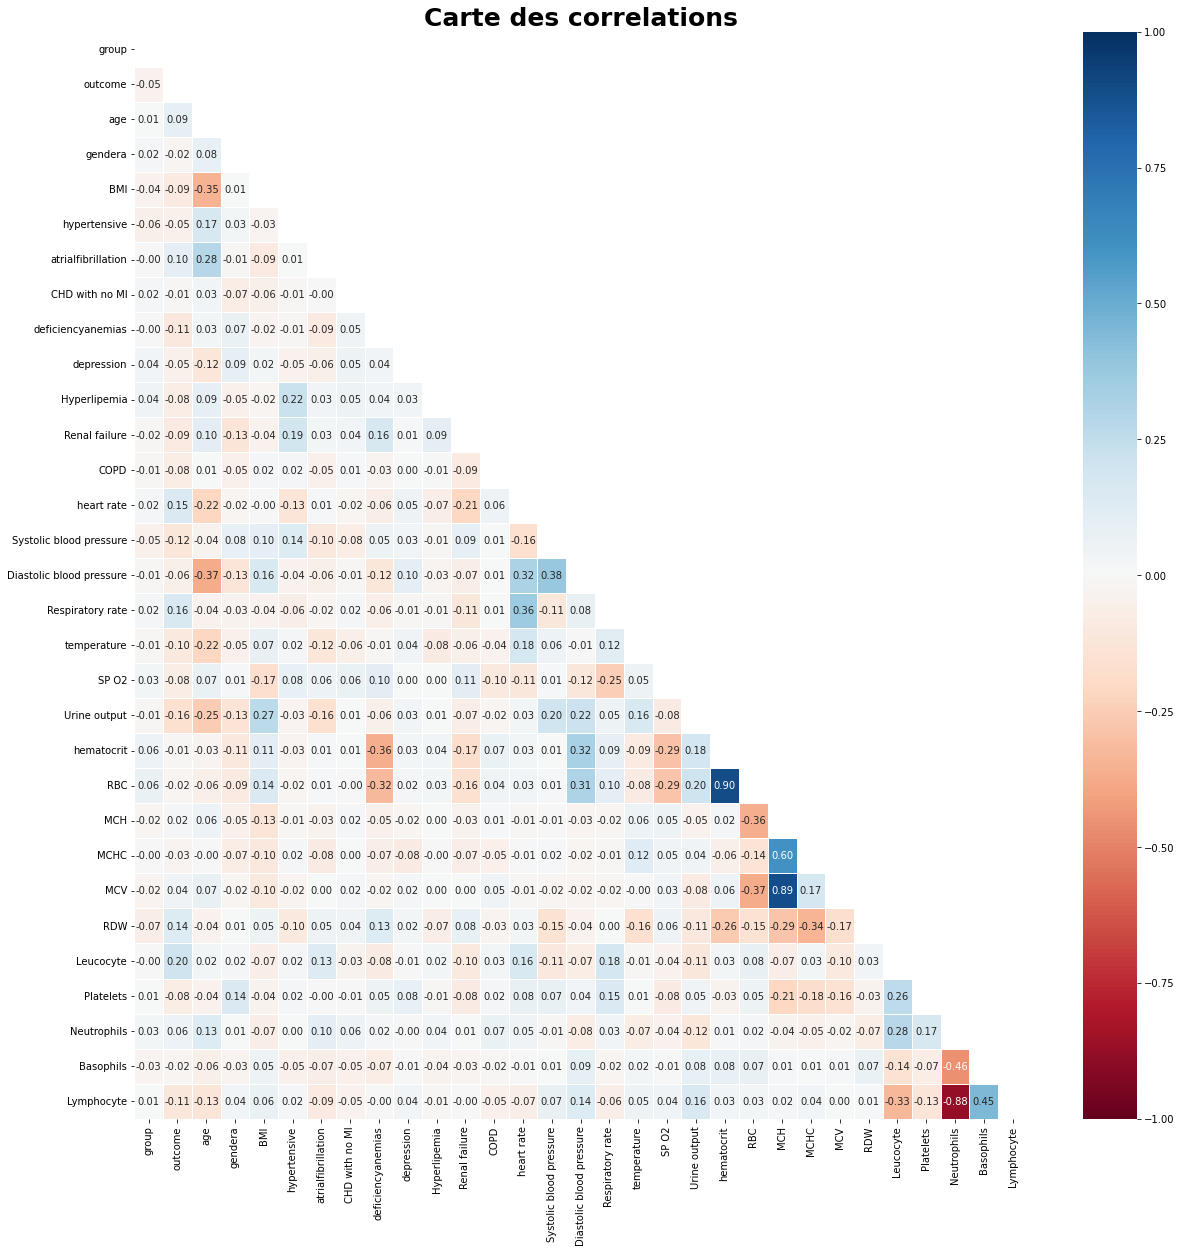

In [39]:
cor = x_train.corr()
mask = np.triu(np.ones_like(cor, dtype = bool)) # pour masquer la 2ème partie du tableau
plt.figure(figsize=(20,20))
sns.heatmap(cor, mask=mask, center= 0, cmap= 'RdBu', linewidths=1, annot=True, fmt= ".2f", vmin=-1, vmax=1)
plt.title('Carte des correlations', fontsize =25, fontweight= "bold")
plt.show()

La création d'une fonction afin de faire sortir les variables qui ont une corrération trés élevé suivant le seuil de correlation

In [40]:
def correlation(data, threshold):
    col_corr = set()
    corr_matrix = data.corr()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

In [41]:
cor_feature = correlation(x_train, 0.6)
print('Le nombre de variables corrélées = ',len(set(cor_feature)))
print('les principaux variables sont: ', cor_feature)

Le nombre de variables corrélées =  4
les principaux variables sont:  {'Lymphocyte', 'MCV', 'MCHC', 'RBC'}


In [116]:
X_train = x_train.drop(cor_feature, axis= 1)
X_test = x_test.drop(cor_feature, axis=1)

In [117]:
y_train.value_counts()

0    561
1    404
Name: diabetes, dtype: int64

# Selection des variables en utilisant la mutual information


In [44]:
from sklearn.feature_selection import mutual_info_classif

mutual_infos = mutual_info_classif(x_train, y_train)

In [45]:
# Voyons les variables correspondantes

mutual_infos = pd.Series(mutual_infos)
mutual_infos.index = x_train.columns
mutual_infos.sort_values(ascending= False) 

BMI                         0.033875
MCH                         0.032542
depression                  0.028470
Neutrophils                 0.028458
heart rate                  0.022687
outcome                     0.021092
Platelets                   0.017522
Leucocyte                   0.014944
Renal failure               0.014088
CHD with no MI              0.012044
RDW                         0.009724
MCV                         0.008665
Basophils                   0.004799
Diastolic blood pressure    0.001317
hypertensive                0.001299
MCHC                        0.000000
Urine output                0.000000
RBC                         0.000000
hematocrit                  0.000000
group                       0.000000
SP O2                       0.000000
temperature                 0.000000
Respiratory rate            0.000000
Systolic blood pressure     0.000000
COPD                        0.000000
Hyperlipemia                0.000000
deficiencyanemias           0.000000
a

<AxesSubplot:>

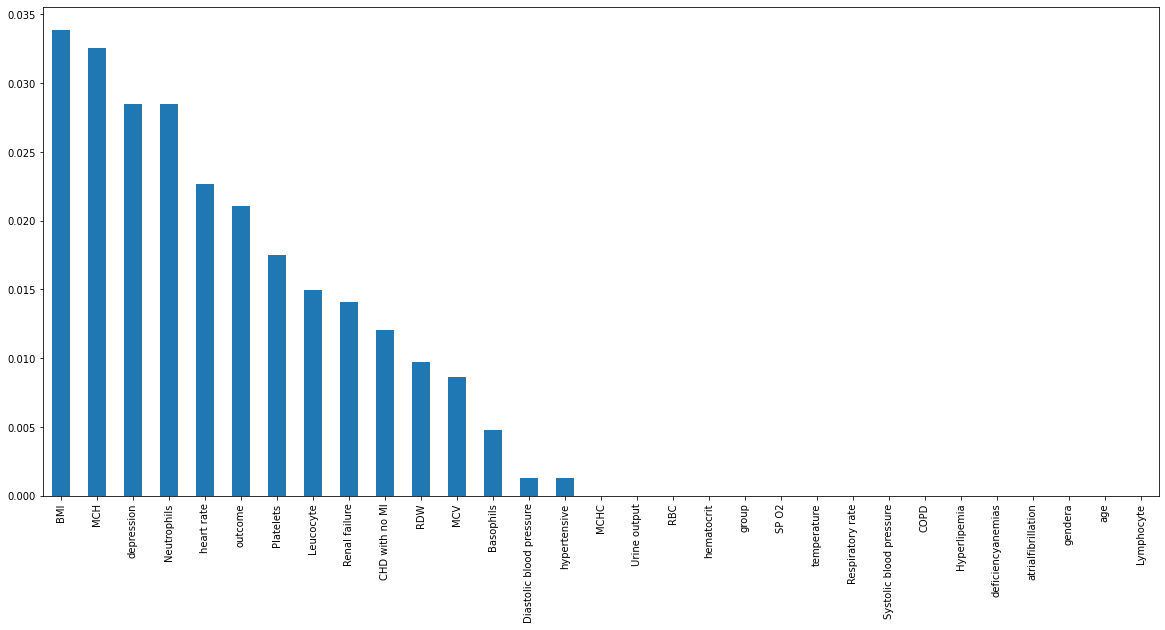

In [46]:
got = mutual_infos.sort_values(ascending= False) 
got.plot.bar(figsize = (20,9))

## Identification des top 10

In [47]:
from sklearn.feature_selection import SelectKBest

select_top = SelectKBest(mutual_info_classif, k=20)
select_top.fit(x_train, y_train)
x_train.columns[select_top.get_support()]

Index(['BMI', 'hypertensive', 'Hyperlipemia', 'Renal failure', 'COPD',
       'heart rate', 'Diastolic blood pressure', 'SP O2', 'Urine output',
       'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte'],
      dtype='object')

## Intialisation des modèles

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [49]:
#X_train, X_test, y_train, y_test

In [50]:
# Initialiser les modèles
models = [LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier()]
model_names = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest']
acc = []
# Boucle sur les modèles et effectuer la classification
for model, model_name in zip(models, model_names):
    classif = model
    classif.fit(X_train, y_train)
    y_pred = classif.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {model_name}: {np.round(accuracy, 3)}")
    # Stocker les scores de précision pour chaque modèle dans un dataframe
    acc.append(accuracy) 
  

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Accuracy of Logistic Regression: 0.599
Accuracy of KNN: 0.5
Accuracy of Decision Tree: 0.571
Accuracy of Random Forest: 0.675


Ensuite, nous initialisons les modèles en utilisant les classes LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier et RandomForestClassifier de scikit-learn. 
Nous les nommons ensuite dans un tableau model_names pour pouvoir les identifier plus facilement lors de la classification.

Enfin, nous effectuons la classification en bouclant sur les modèles et en utilisant la méthode fit pour entraîner le modèle

## Representation graphique

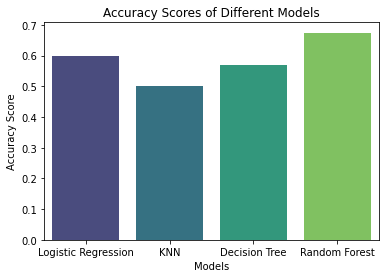

In [51]:
results = pd.DataFrame({'Model': model_names, 'Accuracy Score': acc})
results
# Tracer un graphique en barres des scores de précision
sns.barplot(x='Model', y='Accuracy Score', data=results, palette='viridis')
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Scores of Different Models")
plt.show()

In [52]:
import lazypredict
from lazypredict.Supervised import LazyClassifier, LazyRegressor

In [53]:
lazy = LazyClassifier()
lazy.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:09<00:00,  3.11it/s]


(                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
 Model                                                                           
 NearestCentroid                    0.68               0.68     0.68      0.68   
 LinearDiscriminantAnalysis         0.67               0.66     0.66      0.67   
 RidgeClassifierCV                  0.67               0.66     0.66      0.67   
 RidgeClassifier                    0.67               0.66     0.66      0.67   
 LinearSVC                          0.67               0.66     0.66      0.67   
 LogisticRegression                 0.66               0.65     0.65      0.66   
 BernoulliNB                        0.66               0.64     0.64      0.65   
 CalibratedClassifierCV             0.66               0.64     0.64      0.65   
 XGBClassifier                      0.63               0.62     0.62      0.63   
 AdaBoostClassifier                 0.62               0.61     0.61      0.62   
 DecisionTreeCla

In [84]:
X_train.head()

,group,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,deficiencyanemias,depression,...,temperature,SP O2,Urine output,hematocrit,MCH,RDW,Leucocyte,Platelets,Neutrophils,Basophils
716,1,0.00,66,2,32.99,1,0,0,0,0,...,37.14,96.11,1815.00,34.76,33.51,14.47,10.96,241.57,73.03,0.45
845,2,0.00,65,2,31.63,1,0,0,0,0,...,36.21,95.83,1865.00,31.27,29.33,14.37,19.97,310.17,89.02,0.40
494,1,0.00,78,2,30.19,1,0,0,1,0,...,36.88,97.80,2135.00,30.39,32.53,13.37,13.37,268.67,83.20,0.20
76,1,0.00,60,2,48.75,1,1,0,0,0,...,37.09,97.96,4790.00,37.46,26.97,15.93,11.11,269.86,75.20,0.70
712,1,0.00,70,1,28.03,1,0,0,0,0,...,36.68,96.27,1899.28,28.95,31.25,14.32,9.78,227.75,81.40,0.30


In [118]:
X_train.columns

Index(['group', 'outcome', 'age', 'gendera', 'BMI', 'hypertensive',
       'atrialfibrillation', 'CHD with no MI', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
       'hematocrit', 'MCH', 'RDW', 'Leucocyte', 'Platelets', 'Neutrophils',
       'Basophils'],
      dtype='object')

In [106]:
x_train, x_test,y_train, y_test = train_test_split(x , y, test_size = 0.18, random_state = 42)
x_train.shape, x_test.shape

((965, 31), (212, 31))

In [120]:
X_train = X_train.drop(['group', 'outcome', 'hypertensive',
       'atrialfibrillation', 'CHD with no MI', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'SP O2', 'Urine output',
       'hematocrit', 'MCH', 'RDW', 'Leucocyte', 'Platelets', 'Neutrophils',
       'Basophils'
       ], axis = 1)

In [121]:
X_test = X_test.drop(['group', 'outcome', 'hypertensive',
       'atrialfibrillation', 'CHD with no MI', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'SP O2', 'Urine output',
       'hematocrit', 'MCH', 'RDW', 'Leucocyte', 'Platelets', 'Neutrophils',
       'Basophils'
       ], axis = 1)

In [122]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 965 entries, 716 to 1126
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   outcome             965 non-null    float64
 1   age                 965 non-null    int64  
 2   gendera             965 non-null    int64  
 3   BMI                 965 non-null    float64
 4   hypertensive        965 non-null    int64  
 5   atrialfibrillation  965 non-null    int64  
 6   deficiencyanemias   965 non-null    int64  
 7   depression          965 non-null    int64  
 8   temperature         965 non-null    float64
 9   Urine output        965 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 82.9 KB


In [125]:
X_train.head()

,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,deficiencyanemias,depression,temperature,Urine output
716,0.00,66,2,32.99,1,0,0,0,37.14,1815.00
845,0.00,65,2,31.63,1,0,0,0,36.21,1865.00
494,0.00,78,2,30.19,1,0,1,0,36.88,2135.00
76,0.00,60,2,48.75,1,1,0,0,37.09,4790.00
712,0.00,70,1,28.03,1,0,0,0,36.68,1899.28
...,...,...,...,...,...,...,...,...,...,...
1044,0.00,75,2,27.42,0,0,1,0,36.95,2155.00
1095,0.00,69,2,30.51,0,1,0,0,35.96,2200.00
1130,0.00,69,2,30.19,1,0,0,0,36.73,2090.00
860,0.00,84,2,30.19,1,0,1,0,37.08,2380.00


In [128]:
# Création d'une instance du modèle
model = RandomForestClassifier()

# Entraînement du modèle sur les données d'entraînement
model.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = model.predict(X_test)


In [129]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.5660377358490566


In [130]:
from sklearn.metrics import confusion_matrix

conf_max = confusion_matrix(y_test, y_pred)
print(conf_max)

[[86 34]
 [58 34]]


In [131]:
pickle.dump(model, 'diab.pkl')

['class_dia.pkl']